In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras import backend  # To change the image format
# backend.set_image_data_format('channels_first')
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

# fix random seed for reproducibility
seed = 43
np.random.seed(seed)
img_rows, img_cols = 28,28
epochs = 5
batch_size = 128
numClasses = 10
%matplotlib inline
backend.set_image_data_format('channels_last')

In [13]:
# loading training and test datasets
# test= pd.read_csv("../input/test.csv")
# train = pd.read_csv("../input/train.csv")

trainImages = np.load('trainImages.npy')
testImages = np.load('testImages.npy')

#     train = trainData['train']

# create training and test labels
# y_train = train.iloc[:,0].values.astype('int32') 
# X_train = (train.iloc[:,1:].values).astype('float32') 

trainLabels = np.load('trainLabels.npy')
testLabels = np.load('testLabels.npy')
numImages = trainLabels.shape[1]
# X_test = test.values.astype('float32')

In [14]:
if backend.image_data_format() == 'channels_first':
    trainImages = trainImages.reshape(trainImages.shape[0], 1, img_rows, img_cols)
    testImages = testImages.reshape(testImages.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainImages = trainImages.reshape(trainImages.shape[0], img_rows, img_cols, 1)
    testImages = testImages.reshape(testImages.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
trainImages = trainImages.astype('float32')
testImages = testImages.astype('float32')
trainImages /= 255
testImages /= 255
print('trainImages shape:', trainImages.shape)
print(trainImages.shape[0], 'train samples')
print(testImages.shape[0], 'test samples')

# trainLabels = to_categorical(trainLabels,numClasses)
# testLabels = to_categorical(testLabels,numClasses)


trainImages shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


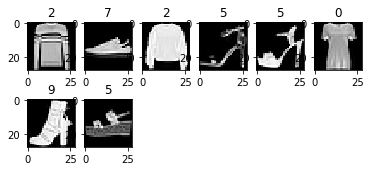

In [15]:
#Convert train datset to (num_images, img_rows, img_cols) format 
# X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(5, 13):
    plt.subplot(355 + (i+1))
#     plt.imshow(trainImages[i])
    plt.imshow(trainImages[i][:,:,0], interpolation='nearest', cmap='gray') 
# plt.show()
    plt.title(np.argwhere(trainLabels[i]>0)[0][0])    

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numClasses, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(trainImages, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testImages, testLabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 59s 976us/step - loss: 0.5699 - acc: 0.7979 - val_loss: 0.3553 - val_acc: 0.8693
Epoch 2/5
60000/60000 [==============================] - 53s 889us/step - loss: 0.3613 - acc: 0.8715 - val_loss: 0.3065 - val_acc: 0.8899
Epoch 3/5
60000/60000 [==============================] - 53s 883us/step - loss: 0.3104 - acc: 0.8888 - val_loss: 0.2681 - val_acc: 0.9025
Epoch 4/5
60000/60000 [==============================] - 57s 952us/step - loss: 0.2763 - acc: 0.9007 - val_loss: 0.2600 - val_acc: 0.9049
Epoch 5/5
60000/60000 [==============================] - 55s 914us/step - loss: 0.2518 - acc: 0.9102 - val_loss: 0.2547 - val_acc: 0.9073


In [17]:
score = model.evaluate(testImages, testLabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2546781042456627
Test accuracy: 0.9073


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


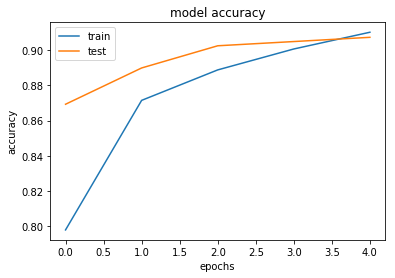

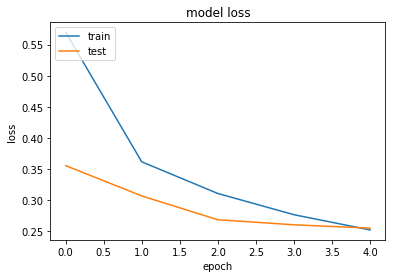

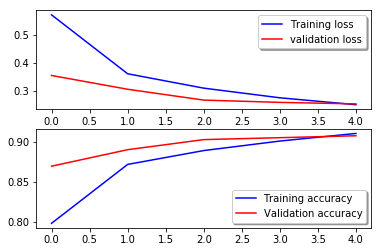

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# # Plot the loss and accuracy curves for training and validation 
# fig, ax = plt.subplots(2,1)
# ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
# legend = ax[0].legend(loc='best', shadow=True)

# ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
# legend = ax[1].legend(loc='best', shadow=True)


In [19]:
# print(tf.__version__)